# 2139484
## Syed Sajjad Askari

### Question I:
#### Show that a simple perceptron cannot solve the XOR problem from the given figure


In [5]:
#for manuplating
import pandas as pd
#for numeric calculation
import numpy as np
#for plotting
import matplotlib.pyplot as plt
##for jupyter notebook to be in plot
%matplotlib inline
#plotting and loading datasete
import seaborn as sns
import sklearn

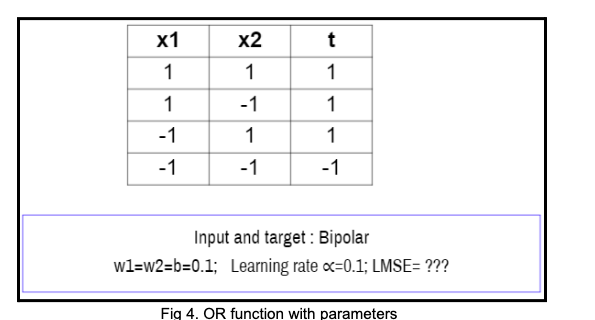

In [9]:
XOR_Gate = {
    "x1" :[-1,-1,1,1],
    "x2" : [-1,1,-1,1],
    "y" : [-1,1,1,-1]
}

df_XOR = pd.DataFrame(XOR_Gate)

In [10]:
## Prepare the data
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis = 1)
    y = df[target_col]
    
    return X, y


X, y = prepare_data(df_XOR)

In [11]:
X.shape

(4, 2)

In [15]:
y.shape

(4,)

In [148]:
X

,x1,x2
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [149]:
y

0   -1
1    1
2    1
3   -1
Name: y, dtype: int64

In [150]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs        
    ## Fardward pass
    ##Matrix Multiplication
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    ## define Activation Function() 
    ##Linear Activation
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss

In [151]:

ETA = 0.1 # 0 and 1
EPOCHS = 5

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)
1



initial weights before training: 
[ 0.00015315 -0.00010859  0.00011928]

X with bias: 
[[-1. -1. -1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0   -1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/5: 
[-0.09984685  0.09989141  0.10011928]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 1 0 0]
error: 
0   -1
1    0
2    1
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/5: 
[ 1.53154674e-04 -1.08588492e-04  2.00119284e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0   -1
1    1
2    1
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/5: 
[ 1.53154674e-04 -1.08588492e-04  2.00119284e-01]
####################
--------------------
for epoch >> 3
--------------------
pre

In [158]:
y_pred = model.predict(X)

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.25


## Show that a two-layer perceptron can solve the XOR problem. 
### 1. Plot the output solution.
### 2. Submit all layer weights, confusion matrix and learning curves of training errors 


In [117]:
# Sigmoid Activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)


In [118]:
# Initialzing input and output values - as in XOR table

# input parameters
inputs = np.array([[-1, -1],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])

# output parameters
outputs = np.array([[-1], [1], [1], [-1]])

In [119]:
# Feed Forward network

def forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias):

    hidden_layer_activation = np.dot(inputs, hidden_weights)
    hidden_layer_activation += hidden_bias

    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias

    predicted_output = sigmoid(output_layer_activation)

    return predicted_output, hidden_layer_output

In [120]:
# Backward propagation step

def backward_pass(expected_output, predicted_output, output_weights, hidden_layer_output):

    error = expected_output - predicted_output

    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    return d_predicted_output, d_hidden_layer

In [131]:
# initializing learning rate
lr = 0.1
# total epochs
epochs = 20
# 1 output layer neuron for single output
# 2 input layer neuron to pass 
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1

In [132]:
# Training Neural Network

def train(epochs, lr, inputs, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons):

  # Initializing random weights and biases for training

    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))

    hidden_bias =np.random.uniform(size=(1, hiddenLayerNeurons))

    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))

    output_bias = np.random.uniform(size=(1, outputLayerNeurons))

    for epoch in range(epochs):

    # forward pass
        predicted_output, hidden_layer_output = forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias)

        # backward pass
        d_predicted_output, d_hidden_layer = backward_pass(outputs, predicted_output, output_weights, hidden_layer_output)

        #Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr

        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr

        hidden_weights += inputs.T.dot(d_hidden_layer) * lr

        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Training.... epoch: {epoch}")
    if epoch == (epochs - 1):
        print('\nTraining completed!')
      
    return predicted_output

In [140]:
predicted_output = train(epochs, lr, inputs, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons)



Training completed!


In [134]:
# Predicted Output
print('\nPredicted output:')
print(predicted_output)

print('\n Round value of the predicted labels:\n')
for val in predicted_output:
    print(np.round(val))


Predicted output:
[[0.33220424]
 [0.32476832]
 [0.33488447]
 [0.32742765]]

 Round value of the predicted labels:

[0.]
[0.]
[0.]
[0.]
